## Random Forest: Wine Dataset

### This notebook demonstrates a clean, end-to-end Random Forest workflow:
- 1) Data loading & overview
- 2) EDA & data quality checks 
- 3) Preprocessing with ColumnTransformer 
- 4) Train/Validation split with stratification 
- 5) SMOTE 


## LOAD DATA

In [137]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df= pd.read_csv(r"C:\Users\guddu\OneDrive\Desktop\data set\wine_fraud.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [265]:
df['quality'].value_counts()

quality
1    5084
0     236
Name: count, dtype: int64

## QUICK DATA AUDIT

In [268]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int32  
 12  type                  5320 non-null   int32  
dtypes: float64(11), int32(2)
memory usage: 540.3 KB


In [270]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,0.955639,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.205915,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,1.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,1.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


In [272]:
# missing values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [274]:
# duplicates
df.duplicated().sum()

0

In [276]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [278]:
df.duplicated().sum()

0

## EDA(Exploratory Data Analysis)

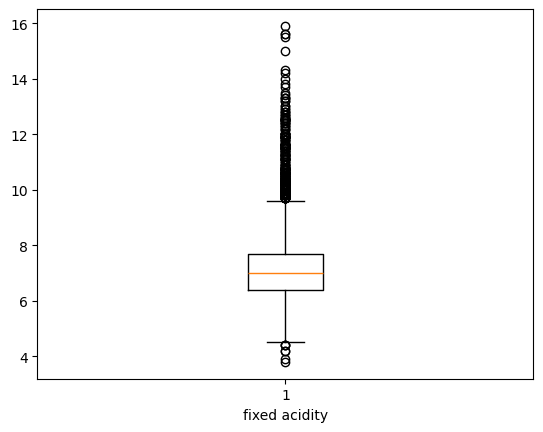

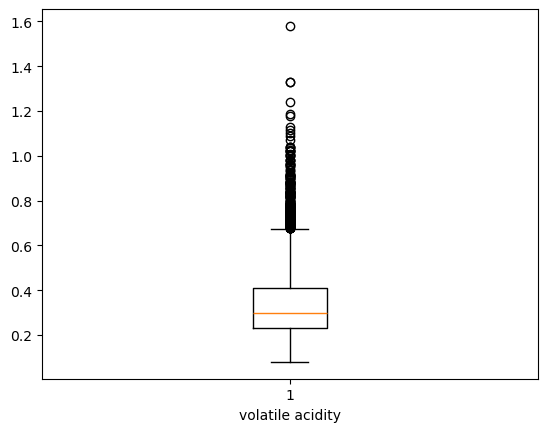

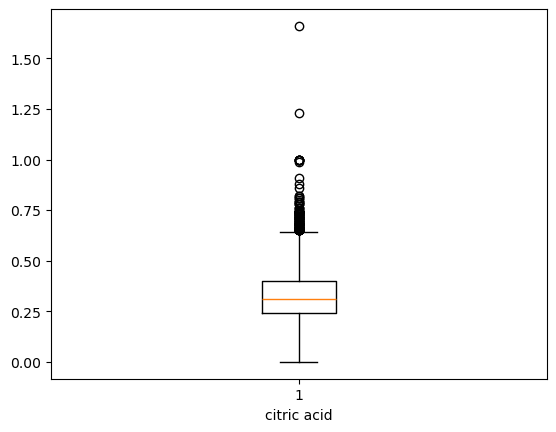

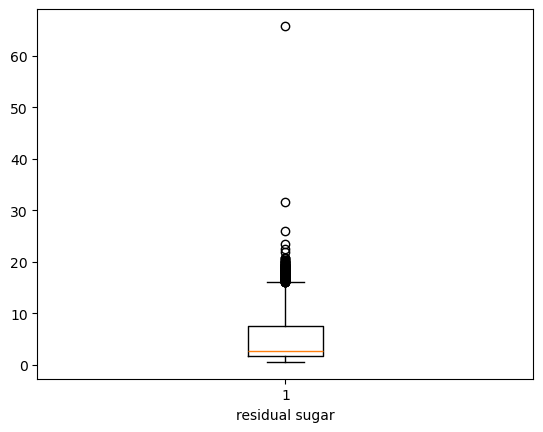

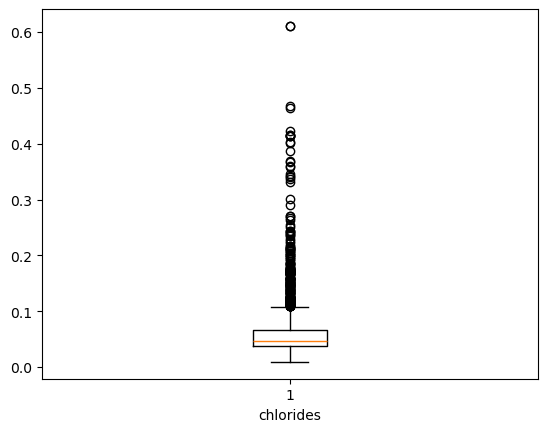

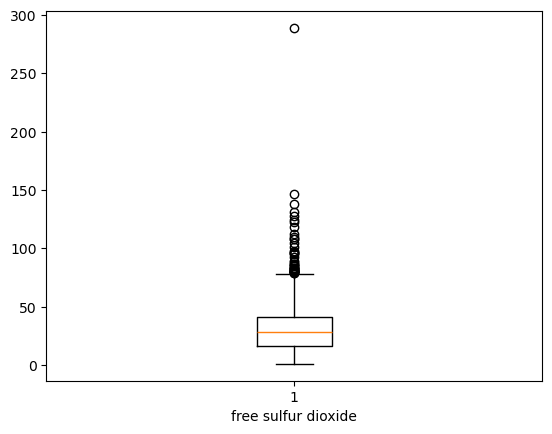

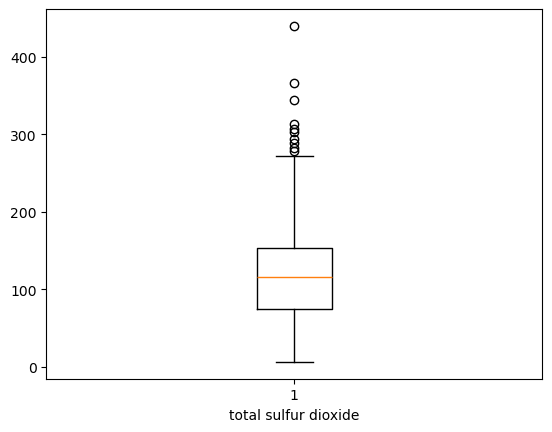

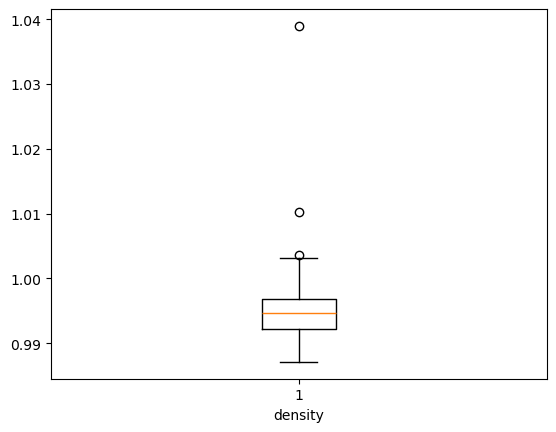

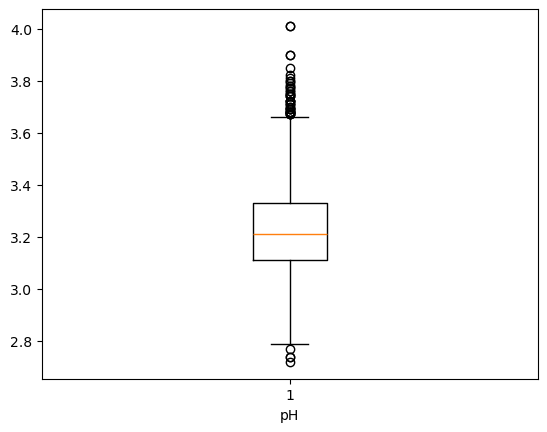

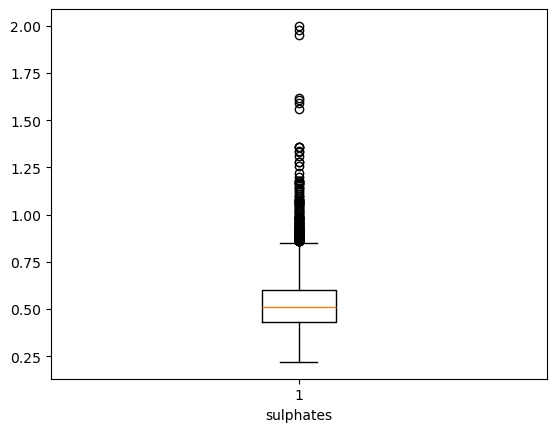

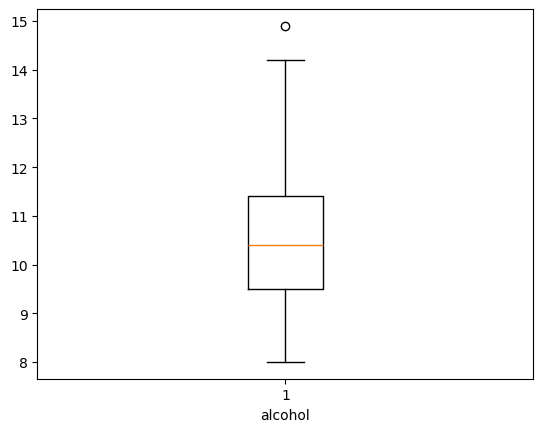

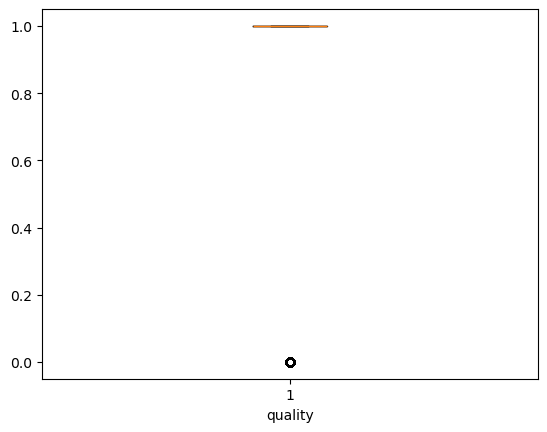

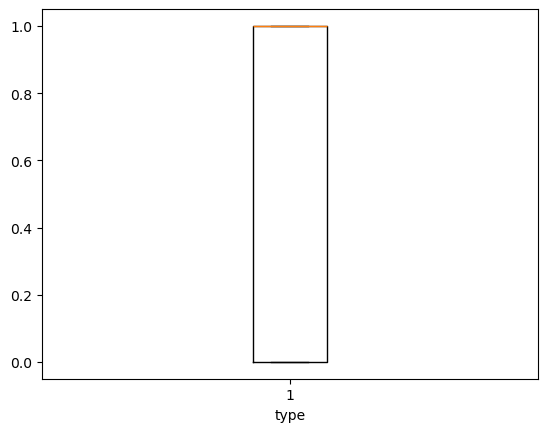

In [281]:
# Check for the Outliers 
for x in df.columns:
    if df[x].dtype=='object':
        continue
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.show()

#### Decision Tree / Random Forest → They are robust to outliers, because splits are based on thresholds, not on mean values.
#### You don’t need to remove outliers — Random Forest will handle them.
#### Outliers in wine chemical properties (like alcohol %, sugar, pH) may actually indicate fraudulent or unusual wine.
#### If you remove them, you might throw away the very fraud cases you want to detect.
#### So, for fraud detection, outliers = important signals.

## Preprocessing
#### Label Encoding categorical features (excluding target)
#### Leave numeric features as-is (Random Forests are robust)
#### Encode target only if it's non-numeric


## Convert our quality column and type column into numerical column.

In [285]:
from sklearn.preprocessing import LabelEncoder

In [288]:
le= LabelEncoder()
df['quality']= le.fit_transform(df['quality'])
df['type']= le.fit_transform(df['type'])

In [290]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,1


In [292]:
li=[]
for x in df.columns:
    if x== 'quality':
        continue
    li.append(x)

In [294]:
# NAME OF ALL INDEPENDENT COLUMNS
li

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

In [296]:
x= df[li]
y= df ['quality']

In [298]:
x


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [300]:
# Depended variable
y

0       1
1       1
2       1
3       1
5       1
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: quality, Length: 5320, dtype: int64

In [302]:
# another approach
x= df.drop(columns=['quality'])

In [304]:
# INDEPENDENT VARIABLE
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


##  Train/Test Split (Stratified)

In [307]:
from sklearn.model_selection import train_test_split

In [309]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [311]:
x_train.shape

(4256, 12)

In [313]:
x_test.shape

(1064, 12)

In [315]:
y_train.shape

(4256,)

In [317]:
y_test.shape

(1064,)

In [319]:
from sklearn.ensemble import RandomForestClassifier

In [321]:
model = RandomForestClassifier()
model.fit(x_train , y_train )

RandomForestClassifier()

In [322]:
y_pred = model.predict(x_test)

In [323]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [327]:
result = pd.DataFrame (columns=['Actual values','Predicted values'])
result['Actual values']= y_test
result ['predicted values']= y_pred
result ['predicted values'].value_counts()

predicted values
1    1053
0      11
Name: count, dtype: int64

In [329]:
y_test.value_counts()

quality
1    1022
0      42
Name: count, dtype: int64

In [331]:
from sklearn.metrics import accuracy_score

In [333]:
accuracy_score(y_test,y_pred)

0.9577067669172933

## SMOTE : SYNTHETIC MINORITY OVER - SAMPLING TECHNIQUE

In [336]:
from imblearn.over_sampling import SMOTE

In [338]:
smote = SMOTE()
new_x , new_y = smote.fit_resample(x, y )

In [340]:
new_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,0
4,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10163,6.387059,0.274353,0.488235,7.150195,0.049725,34.419607,200.435295,0.995429,3.194824,0.544353,9.545098,1
10164,8.246445,0.207513,0.395305,1.212691,0.046657,31.469546,106.751273,0.991983,3.026295,0.364086,10.471827,1
10165,4.210657,0.215145,0.231163,5.121636,0.041016,63.980624,157.022605,0.996884,3.419193,0.440065,8.002906,1
10166,6.046343,0.676807,0.025942,1.621730,0.079188,6.000000,12.594234,0.995394,3.615366,0.624058,10.039135,0


In [342]:
y.value_counts()

quality
1    5084
0     236
Name: count, dtype: int64

In [344]:
new_y.value_counts()

quality
1    5084
0    5084
Name: count, dtype: int64

In [346]:
new_x.duplicated().sum()

0

In [348]:
x_train , x_test, y_train , y_test = train_test_split(new_x , new_y , test_size=0.2 , random_state= 42 )

In [350]:
x_train.shape

(8134, 12)

In [352]:
x_test.shape

(2034, 12)

In [354]:
y_train.shape

(8134,)

In [356]:
y_test.shape

(2034,)

In [358]:
final_model = RandomForestClassifier()
final_model.fit(x_train , y_train)

RandomForestClassifier()

In [359]:
y_pred = final_model.predict(x_test)
accuracy_score(y_pred , y_test)

0.9670599803343166

In [360]:
pd.DataFrame(y_pred).value_counts()

0
0    1034
1    1000
Name: count, dtype: int64

In [365]:
import os
os.getcwd()


'C:\\Users\\guddu\\GITHUB'